# Introduction to physics of complex systems

## Problem Sheet 01

Name: Corinna Elena Wegner

##  Problem 1: Fixed points and stability 
Analyze the following systems graphically. In each case, draw the graphs and indicate the direction of the flow on the real line. Use this to find all the fixed points and classify their stability. (Hint: When $\frac{dx}{dt}=f(x)-g(x)$, sketch the graphs of $f(x)$ and $g(x)$ on the same axes, and look for intersections. You can also use this to decide when the right-hand side is positive or negative and consequently determine the stability properties of the fixed points.)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f_1(x):
    return x - x**2

def f_2(x):
    return x-np.cos(x)

def f_3(x):
    return 1-2*np.cos(x)

def plot_function(f, xmin, xmax, rate_arrows):
    x = np.linspace(xmin,xmax,(xmax-xmin)*100)
    list_f = [f(i) for i in x]
    plt.plot(x, list_f)
    intersections = np.argwhere(np.diff(np.sign(list_f))).flatten()
    intersections = list(intersections)
    intersections.append(0)
    intersections.append((xmax-xmin)*100)
    set(intersections)
    intersections.sort()
    for i in range(len(intersections)-1):
        x_in = x[intersections[i]:intersections[i+1]][::rate_arrows]
        if list_f[intersections[i]+1] > 0:
            plt.plot(x_in,np.zeros(len(x_in)),"green", marker = ">")
        else:
            plt.plot(x_in, np.zeros(len(x_in)),"orange" , marker = "<")
    plt.xlabel("x")
    plt.ylabel("dx/dt")
    plt.grid()

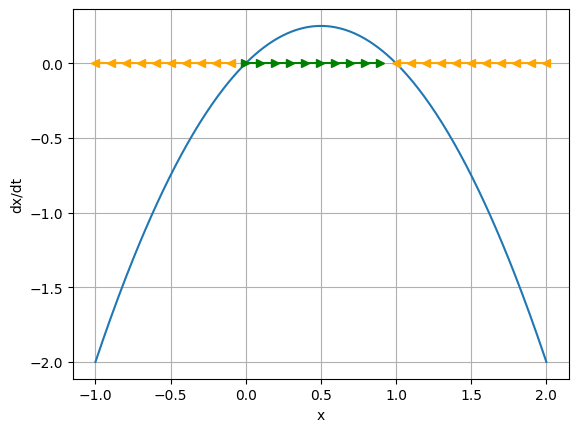

In [3]:
plot_function(f_1, -1, 2, 10)

$\frac{dx}{dt}=x-x^2$: Two fixed points. One at $x=0$ (unstable) and another at $x=1$ (stable)

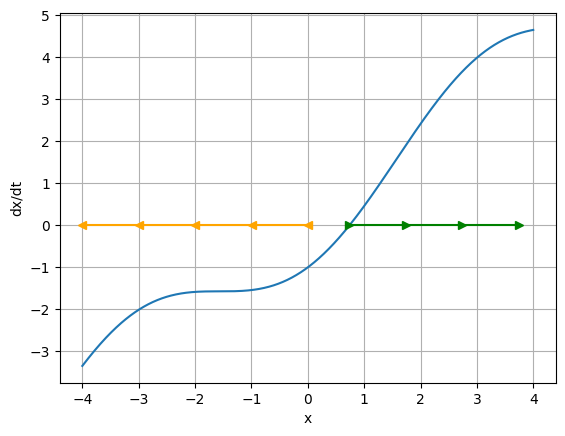

In [4]:
plot_function(f_2, -4, 4, 100)

$\frac{dx}{dt}=x-cos(x)$: One unstable fixed point at $x=0.739085$


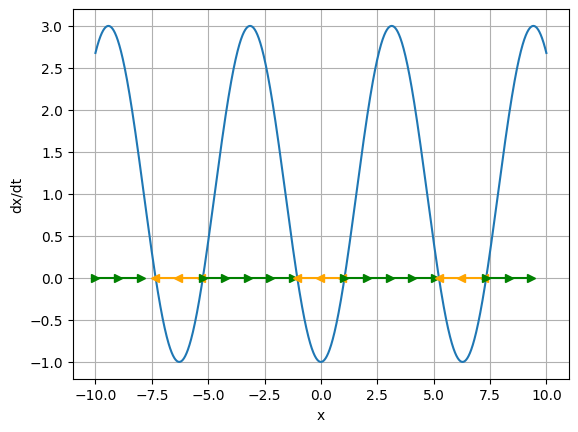

In [5]:
plot_function(f_3, -10,10,100)

Infinite fixed points at $x_n = \frac{\pi}{3}(6n-1)$ (stable) and $x_n= \frac{\pi}{3}(6n+1), n \in \mathbb{Z}$ (unstable)

## Problem 2: Saddle-node bifurcation 3x2 points
For the following systems, show that a saddle-node bifurcation occurs at some critical value of r. You can decide whether to do this fully analytically (determining fixed points and their stability as a function of r) or by arguing about the shape of the right-hand side function and how r alters it. In any case, sketch the qualitatively different right-hand sides that occur as r is varied (one below, one at, one above the bifurcation). Always determine the critical value of r analytically.

Hint: To determine the critical value of r analytically, it is not necessary to calculate the fixed points analytically for arbitrary parameters values (which is not even possible in some of the cases above), if you already know that the bifurcation occurs. Remember that the stability properties change at the bifurcation point, meaning that, for a system $\dot{x} = f(x;p)$ with some parameter $p$, both $f(x^{*}; p^{*})=0$ (fixed point) and $f'(x^{*}; p^{*})=0$ (stability change) must hold at the bifurcation point simultaneously.

In [6]:
def f_4(x,r):
    return 1+r*x+x**2

def f_5(x,r):
    return r-np.cosh(x)

def f_6(x,r): #x > -1
    return r+x-np.log(1+x) 

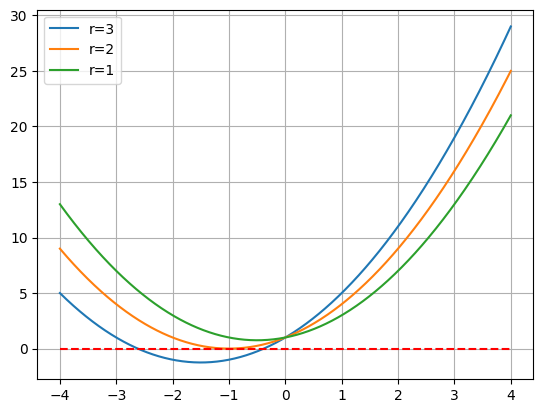

In [11]:
x4 = np.linspace(-4,4,1000)
list_r = [3,2,1]
for r in list_r:
    list_f4 = [f_4(i, r) for i in x4]
    plt.plot(x4, list_f4, label = f"r={r}")
plt.grid()
plt.legend()
plt.plot(x4, np.zeros(len(x4)), "r--")

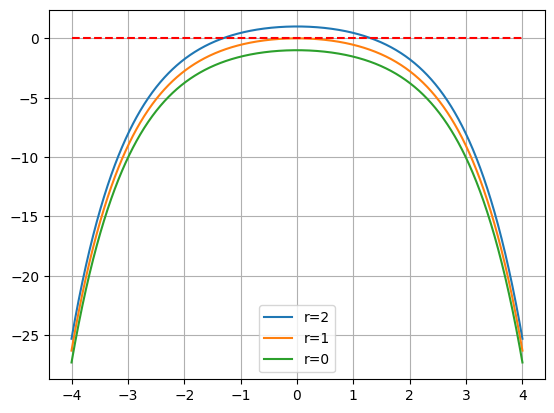

In [14]:
x5 = np.linspace(-4,4,1000)
list_r = [2,1, 0]
for r in list_r:
    list_f5 = [f_5(i, r) for i in x5]
    plt.plot(x5, list_f5, label = f"r={r}")
plt.grid()
plt.legend()
plt.plot(x5, np.zeros(len(x5)), "r--")

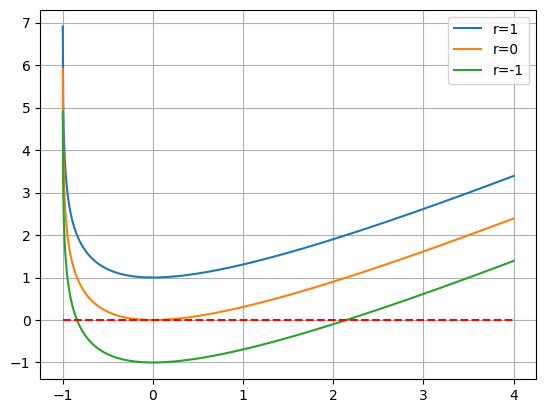

In [19]:
x6 = np.linspace(-0.999,4,1000)
list_r = [1,0,-1]
for r in list_r:
    list_f6 = [f_6(i, r) for i in x6]
    plt.plot(x6, list_f6, label = f"r={r}")
plt.grid()
plt.legend()
plt.plot(x6, np.zeros(len(x6)), "r--")